# [About Dataset](https://www.kaggle.com/code/marissafernandes/asteroid-prediction)

The dataset is maintained by the Jet Propulsion Laboratory of California Institute of Technology which is an organization under NASA.

---
## Columns Definition (refer [NASA JPL's glossary](https://cneos.jpl.nasa.gov/glossary/) for further information)

- SPK-ID: Object primary SPK-ID **(remove)**
- Object ID: Object internal database ID **(remove)**
- Object fullname: Object full name/designation **(remove)**
- pdes: Object primary designation **(remove)**
- name: Object IAU name **(remove)**
- NEO: Near-Earth Object (NEO) flag
- PHA: Potentially Hazardous Asteroid (PHA) flag
- H: Absolute magnitude parameter
- Diameter: object diameter (from equivalent sphere) km Unit
- Albedo: Geometric albedo
- Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
- Orbit_id: Orbit solution ID
- Epoch: Epoch of osculation in modified Julian day form
- Equinox: Equinox of reference frame
- e: Eccentricity
- a: Semi-major axis au Unit
- q: perihelion distance au Unit
- i: inclination; angle with respect to x-y ecliptic plane
- tp: Time of perihelion passage TDB Unit
- moid_ld: Earth Minimum Orbit Intersection Distance au Unit

---

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns

# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

train = pd.read_csv("../input/asteroid-dataset/dataset.csv")

train.isnull().sum()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


# 1. Data Cleaning
---

There are a lot of missing values, let's first remove columns that are just assigned for naming purpose (not useful):
- id
- full_name
- pdes
- orbit_id
- name
- prefix
- equinox
- spkid

Although the columns:
- diameter
- albedo
- diameter_sigma
    
might contain useful insighs, they have a lot of missing values. Therefore, the respective columns should be removed as there is no reliable was to impute the missing values.

---

In [2]:
Xo = train.copy().drop(['id',
                        'full_name', 
                        'pdes',
                        'orbit_id',
                        'name', 
                        'prefix', 
                        'equinox', 
                        'spkid',
                        'diameter',
                        'albedo',
                        'diameter_sigma'], axis='columns', inplace=False)
yo = Xo.pop('pha')
# cat_feature = Xo[['neo','class']].columns
cat_feature = list(Xo.select_dtypes(include = ['object']).columns)
num_feature = list(Xo.select_dtypes(include = ['int64','float64']).columns)
parameters = cat_feature + num_feature + ["pha"]

print("Number of entries: \n" + str(train.shape[0]))
print("\nCategorical Values (Missing): \n" + str(train[cat_feature].isnull().sum()))
print("\nNumerical Values (Missing): \n" + str(train[num_feature].isnull().sum()))

Number of entries: 
958524

Categorical Values (Missing): 
neo      4
class    0
dtype: int64

Numerical Values (Missing): 
H             6263
epoch            0
epoch_mjd        0
epoch_cal        0
e                0
a                0
q                0
i                0
om               0
w                0
ma               1
ad               4
n                0
tp               0
tp_cal           0
per              4
per_y            1
moid         19921
moid_ld        127
sigma_e      19922
sigma_a      19922
sigma_q      19922
sigma_i      19922
sigma_om     19922
sigma_w      19922
sigma_ma     19922
sigma_ad     19926
sigma_n      19922
sigma_tp     19922
sigma_per    19926
rms              2
dtype: int64


---
Removing rows that are not imputable:
- pha
- H
- sigma_ad
- ma

---

In [3]:
X = train[train['pha'].notna()]
X = X[X['H'].notna()]
X = X[X['sigma_ad'].notna()]
X = X[X['ma'].notna()]
X = X[parameters]
X = X.reset_index()
X = X.drop(["index"] ,axis='columns', inplace=False)
X

,neo,class,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,pha
0,N,MBA,3.400,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.43301,N
1,N,MBA,4.200,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,0.35936,N
2,N,MBA,5.330,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,0.33848,N
3,N,MBA,3.000,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,0.39980,N
4,N,MBA,6.900,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,0.52191,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932330,N,MBA,17.135,2437203.5,37203,19600926.0,0.185919,2.280861,1.856807,5.984416,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,0.23839,N
932331,N,MBA,18.500,2459000.5,59000,20200531.0,0.282920,2.334910,1.674319,8.082280,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,0.53633,N
932332,Y,APO,20.400,2459000.5,59000,20200531.0,0.662446,2.817152,0.950941,4.679278,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,0.51556,Y
932333,N,MBA,18.071,2441956.5,41956,19731001.0,0.202053,2.373137,1.893638,0.732484,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,0.25641,N


# 2. Data Processing
---
- Processing categorical variables.

- [Scale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) numerical features

- One-hot encoding on categorical features.
---

In [4]:
# convert to categorical
X['neo'] = X['neo'].astype('category')
X['pha'] = X['pha'].astype('category')
X['class'] = X['class'].astype('category')

# minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X[num_feature])
X_scale = pd.DataFrame(X_scale, columns = num_feature)
X = pd.concat([X_scale,X[cat_feature],X['pha']],axis = 1)

# one-hot encoding
X = pd.get_dummies(X, columns = ['class'])
X = pd.get_dummies(X, columns = ['neo', 'pha'], drop_first = True)
X.head()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,neo_Y,pha_Y
0,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,...,0,0,0,1,0,0,0,0,0,0
1,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,...,0,0,0,1,0,0,0,0,0,0
2,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,0.074158,0.471810,0.689073,...,0,0,0,1,0,0,0,0,0,0
3,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,0.040748,0.288363,0.418691,...,0,0,0,1,0,0,0,0,0,0
4,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,0.030614,0.393253,0.996247,...,0,0,0,1,0,0,0,0,0,0


# 3. EDA
---

<AxesSubplot:>

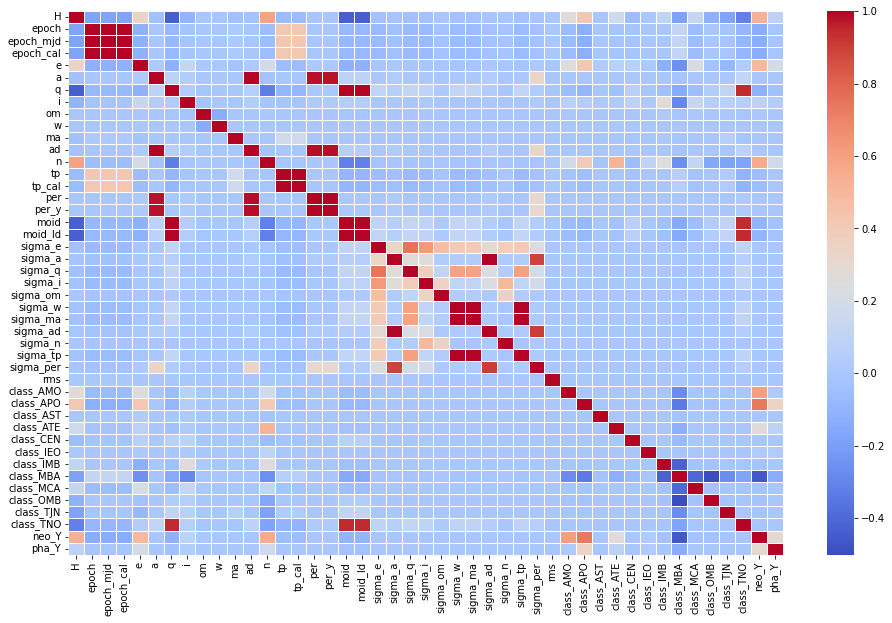

In [5]:
# visualizing the Pearson's Coefficients between features or target
plt.pyplot.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot = False, cmap = "coolwarm", linewidths = 0.5)

In [6]:
# check on the mutual information between features
from sklearn.feature_selection import mutual_info_classif
features = X.columns.drop('pha_Y')
x = X.copy()
y = x.pop("pha_Y")
feature_series = pd.Series(features, name = "Features")
discrete_features = x.dtypes == int

def mi(x,y,discrete_features):
    mi_score = mutual_info_classif(x,y,discrete_features=discrete_features)
    mi_score = pd.Series(mi_score, name = "Mutual Information")
    mi_df = pd.concat([feature_series, mi_score], axis = 1)
    mi_df = mi_df.sort_values(ascending = False, by = ['Mutual Information'])
    return mi_df

mi_df = mi(x,y,discrete_features)

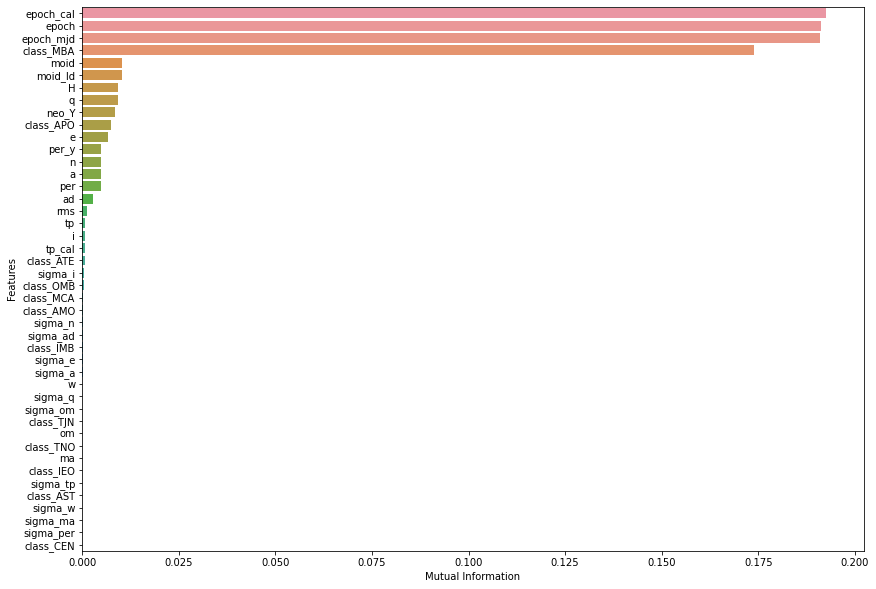

In [7]:
# visualize mutual information
plt.pyplot.figure(figsize=(14,10))
bp_ax = sns.barplot(y=mi_df['Features'],x=mi_df['Mutual Information'])

In [8]:
# extracting the features with MI more than 0.08 [0.04 if want to inspect more]
mi_large = mi_df[mi_df["Mutual Information"] > 0.001]
large_parameter = mi_large.Features.values
len(large_parameter)

17

---
Parameters with large MI values: 
- 'neo_N',
- 'epoch_cal',
- 'epoch',
- 'epoch_mjd',
- 'class_MBA',
- 'moid',
- 'moid_ld',
- 'H',
- 'q',
- 'neo_Y',
- 'class_APO',
- 'e',
- 'n',
- 'a',
- 'per_y',
- 'per',
- 'ad',
- 'rms'

---

In [9]:
X

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,neo_Y,pha_Y
0,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,...,0,0,0,1,0,0,0,0,0,0
1,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,...,0,0,0,1,0,0,0,0,0,0
2,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,0.074158,0.471810,0.689073,...,0,0,0,1,0,0,0,0,0,0
3,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,0.040748,0.288363,0.418691,...,0,0,0,1,0,0,0,0,0,0
4,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,0.030614,0.393253,0.996247,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932330,0.531633,0.357949,0.357949,0.355202,0.185944,0.000052,0.022237,0.034138,0.539528,0.542897,...,0,0,0,1,0,0,0,0,0,0
932331,0.571429,1.000000,1.000000,1.000000,0.282960,0.000053,0.019966,0.046120,0.986801,0.014489,...,0,0,0,1,0,0,0,0,0,0
932332,0.626822,1.000000,1.000000,1.000000,0.662544,0.000068,0.010960,0.026683,0.508286,0.652486,...,0,0,0,0,0,0,0,0,1,1
932333,0.558921,0.497953,0.497953,0.495081,0.202080,0.000054,0.022696,0.004140,0.490275,0.550074,...,0,0,0,1,0,0,0,0,0,0


In [10]:
# # inspecting the individual relationship between the target and features
# fig, axes = plt.pyplot.subplots(6,3, figsize = (16,24))
# k = 0
# for i in range (0,4):
#         for j in range (0,3):
#             sns.stripplot(ax = axes[i,j], x = X['pha_Y'], y = X[large_parameter[k]])
#             axes[i,j].set_title(large_parameter[k])
#             k = k+1

In [11]:
## visualizing the bivariate between features or target
# pplot = np.append(large_parameter, "pha_Y")

# plt.pyplot.figure(figsize=(20,50))
# sns.pairplot(data = X[pplot], hue = "pha_Y", corner = True, markers=["o", "D"])